# A|B Testing

#### Is there an association between smoking and the birth weight of a baby?

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.filterwarnings("ignore", message="Creating an ndarray from ragged")

In [2]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


**Question 1.** Do you think the birth weight of the baby was effected by whether or not thte mother smoked?

**Question 2.** Make a table named `smoking_and_birthweight` that contains `Maternal Smoker` and `Birth Weight` columns.

In [3]:
# Question 2

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


**Question 3.** How many smokers and non-smokers are in the study?

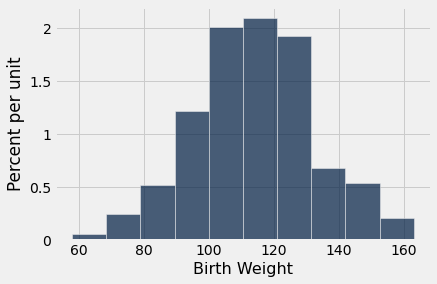

In [4]:
# Question 3

**Question 4.** Make a histogram of the birth wieghts of the babies of the smokers.

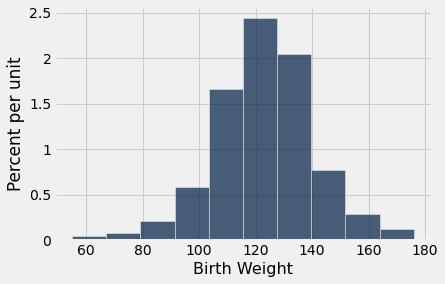

In [5]:
# Question 4

**Question 5.** Make histogram of the birth weights of the babies of the non-smokers.

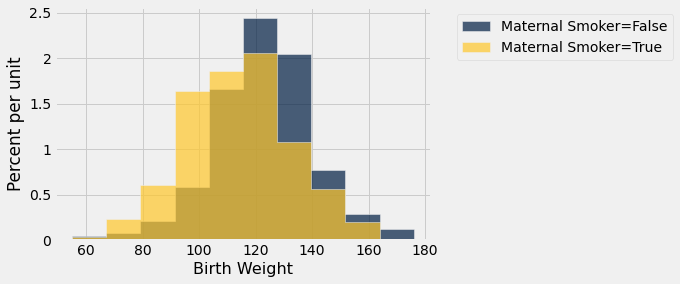

In [9]:
# Question 5

**Question 6.** Let's overlay the histograms from **Question 4.** and **Question 5.**.

In [ ]:
# Question 6

**Question 7.** What is the average birth weight for the smokers? Non-smokers?

In [ ]:
# Question 7

**Question 8.** What is the difference between the average birth weight between the smokers and non-smokers?

In [33]:
means_tbl = baby.select(0,5).group('Maternal Smoker', np.average)
means_tbl

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


**Question 9.** What is the cause of this difference? Would the difference in our sample be the same for the population? Could the difference be due to chance alone? What would be a good test statistic? Let's investigate.

**Question 10.** Write the Null and the Alternative Hypotheses.

**Null:**

**Alternative:** 

**Question 11.** Create a table named `weights` that only has one column with the wieghts for each baby in the sample.

In [ ]:
# Question 11

If we use the `.sample` method and do not specify a sample amount the values in the column will be shuffled. 

Run the cell below.

In [53]:
weights = weights.sample(with_replacement = False)
weights

Birth Weight
85
121
96
146
122
129
127
109
116
105


The code in the cell below takes the `Birth Weight` column from the `weights` table and joins it to a table named `original_and_shuffled`.

Then the calculates the average weight of the babaies between the smokers and non-smokers in the sample.

In [54]:
original_and_shuffled = baby.select('Maternal Smoker', 
                                    'Birth Weight')
original_and_shuffled = original_and_shuffled.with_column('Shuffled by Weight'
                                                          , weights.column(0))
original_and_shuffled.group('Maternal Smoker', np.average)

Maternal Smoker,Birth Weight average,Shuffled by Weight average
False,123.085,119.765
True,113.819,118.991
